In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.19.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0


In [3]:
results_file = "/home/chemo/scRNA_seq/result/sepsis.h5ad"

In [4]:
# Sepsis data
sepsis01 = sc.read_10x_mtx('/home/chemo/scRNA_seq/sepsis01/', var_names='gene_symbols', cache=True)
sepsis01.var_names_make_unique()
sepsis02 = sc.read_10x_mtx('/home/chemo/scRNA_seq/sepsis02/', var_names='gene_symbols', cache=True)
sepsis02.var_names_make_unique()
sepsis03 = sc.read_10x_mtx('/home/chemo/scRNA_seq/sepsis03/', var_names='gene_symbols', cache=True)
sepsis03.var_names_make_unique()
sepsis04 = sc.read_10x_mtx('/home/chemo/scRNA_seq/sepsis04/', var_names='gene_symbols', cache=True)
sepsis04.var_names_make_unique()

# Control data
ctr01 = sc.read_10x_mtx('/home/chemo/scRNA_seq/ctr01/', var_names='gene_symbols', cache=True)
ctr01.var_names_make_unique()
ctr02 = sc.read_10x_mtx('/home/chemo/scRNA_seq/ctr02/', var_names='gene_symbols', cache=True)
ctr02.var_names_make_unique()
ctr03 = sc.read_10x_mtx('/home/chemo/scRNA_seq/ctr03/', var_names='gene_symbols', cache=True)
ctr03.var_names_make_unique()
ctr04 = sc.read_10x_mtx('/home/chemo/scRNA_seq/ctr04/', var_names='gene_symbols', cache=True)
ctr04.var_names_make_unique()
ctr05 = sc.read_10x_mtx('/home/chemo/scRNA_seq/ctr05/', var_names='gene_symbols', cache=True)
ctr05.var_names_make_unique()

... reading from cache file cache/home-chemo-scRNA_seq-sepsis01-matrix.h5ad
... reading from cache file cache/home-chemo-scRNA_seq-sepsis02-matrix.h5ad
... reading from cache file cache/home-chemo-scRNA_seq-sepsis03-matrix.h5ad
... reading from cache file cache/home-chemo-scRNA_seq-sepsis04-matrix.h5ad
... reading from cache file cache/home-chemo-scRNA_seq-ctr01-matrix.h5ad
... reading from cache file cache/home-chemo-scRNA_seq-ctr02-matrix.h5ad
... reading from cache file cache/home-chemo-scRNA_seq-ctr03-matrix.h5ad
... reading from cache file cache/home-chemo-scRNA_seq-ctr04-matrix.h5ad
... reading from cache file cache/home-chemo-scRNA_seq-ctr05-matrix.h5ad


In [5]:
sepsis01.obs['type']="sepsis"
sepsis01.obs['sample']="sep_01"
sepsis02.obs['type']="sepsis"
sepsis02.obs['sample']="sep_02"
sepsis03.obs['type']="sepsis"
sepsis03.obs['sample']="sep_03"
sepsis04.obs['type']="sepsis"
sepsis04.obs['sample']="sep_04"


ctr01.obs['type']="ctr"
ctr01.obs['sample']="ctr_01"
ctr02.obs['type']="ctr"
ctr02.obs['sample']="ctr_02"
ctr03.obs['type']="ctr"
ctr03.obs['sample']="ctr_03"
ctr04.obs['type']="ctr"
ctr04.obs['sample']="ctr_04"
ctr05.obs['type']="ctr"
ctr05.obs['sample']="ctr_05"


# merge into one object.
adata = sepsis01.concatenate(sepsis02, sepsis03, sepsis04,
                             ctr01, ctr02, ctr03, ctr04, ctr05)

# and delete individual datasets to save space
#del(data_denv10, data_denv15, data_denv28)
#del(data_ctrl5, data_ctrl3, data_ctrl2)

In [6]:
print(adata.obs['sample'].value_counts())
adata

sep_03    737280
sep_04    737280
sep_01    737280
ctr_03    737280
sep_02    737280
ctr_02    737280
ctr_01    737280
ctr_05    737280
ctr_04    737280
Name: sample, dtype: int64


AnnData object with n_obs × n_vars = 6635520 × 32738
    obs: 'type', 'sample', 'batch'
    var: 'gene_ids', 'feature_types'

normalizing counts per cell
    finished (0:00:00)


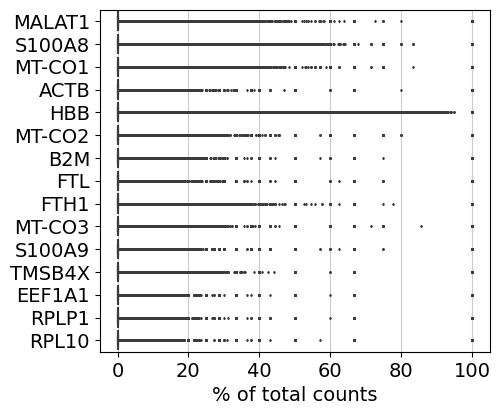

In [7]:
sc.pl.highest_expr_genes(adata, n_top=15, )

In [8]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 6587881 cells that have less than 200 genes expressed
filtered out 12435 genes that are detected in less than 3 cells


In [9]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'type' as categorical
... storing 'sample' as categorical
... storing 'feature_types' as categorical


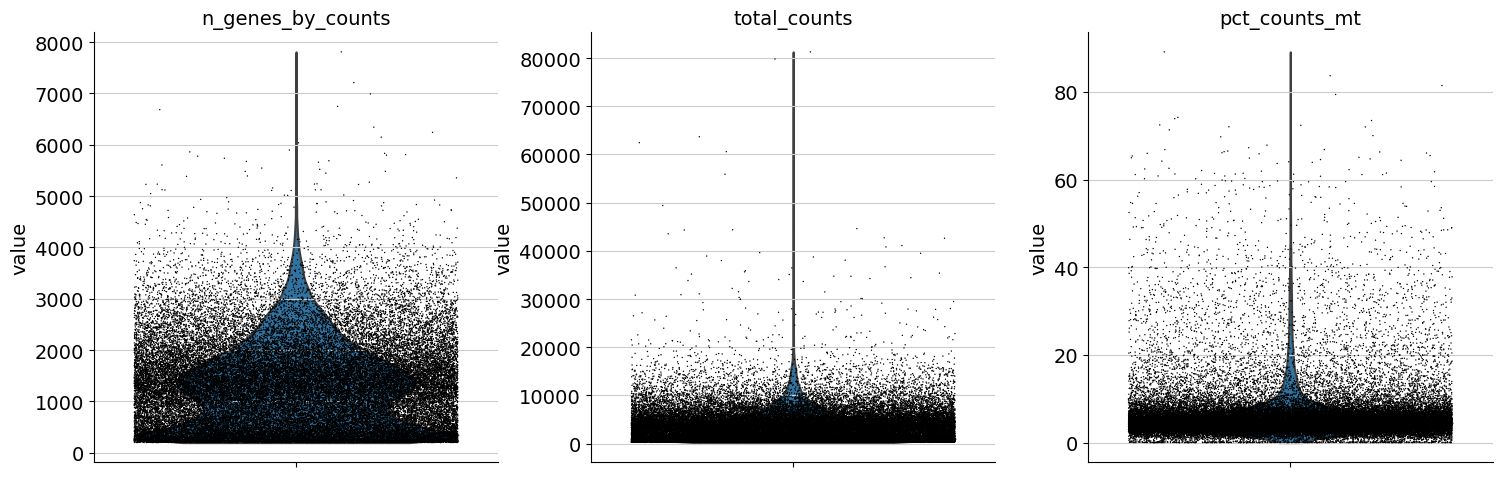

In [10]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

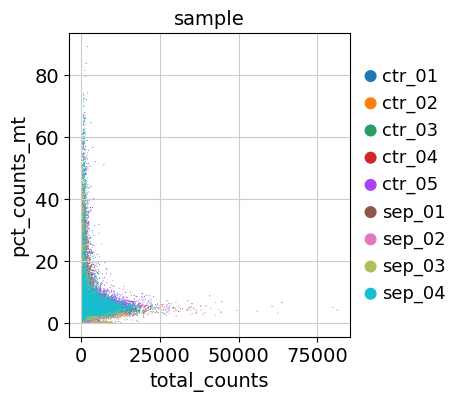

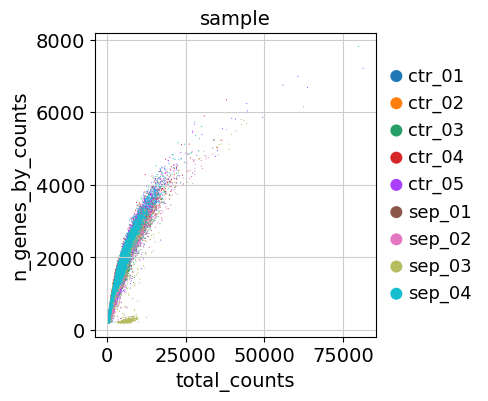

In [11]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color="sample", save="_pct_cnt_MT.png")
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color="sample", save="_n_genes_by_counts.png")

In [12]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

/home/chemo/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


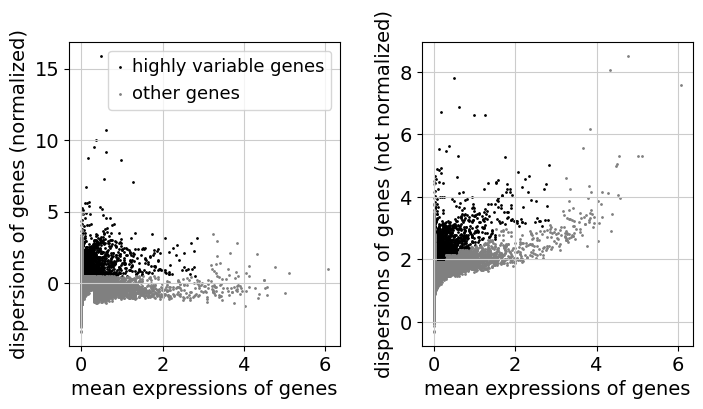

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [14]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:01:28)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)


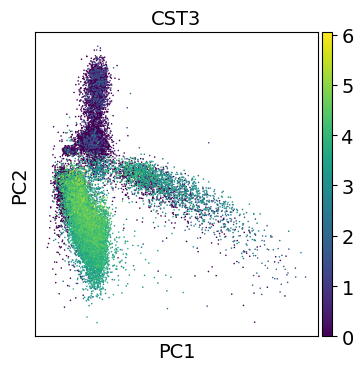

In [15]:
sc.pl.pca(adata, color='CST3')

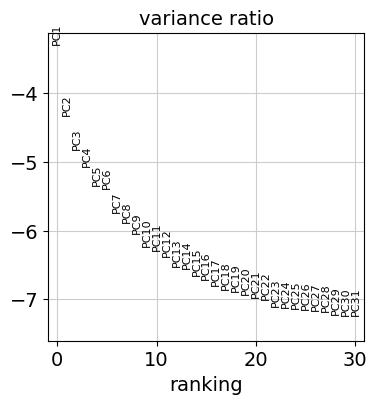

In [16]:
sc.pl.pca_variance_ratio(adata, log=True)

In [17]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 23204 × 3252
    obs: 'type', 'sample', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'sample_colors', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [18]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)


In [19]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


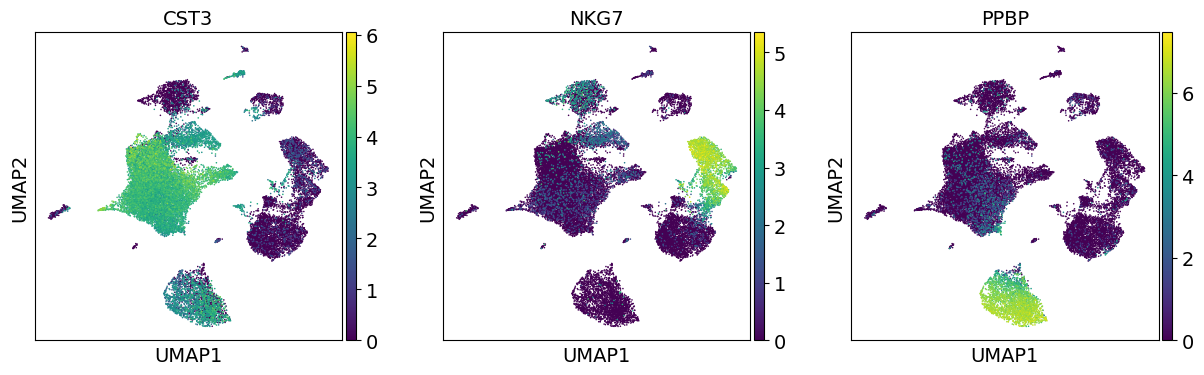

In [20]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], save="_cst3_nkg7_ppbp.png")

In [21]:
#sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False, save="_useRAW.png")

running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


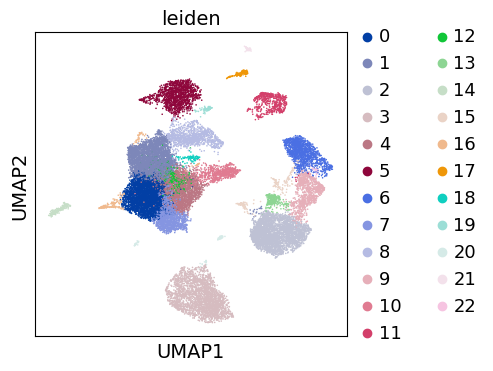

In [22]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'], save="_leiden.png")

In [23]:
adata.write(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


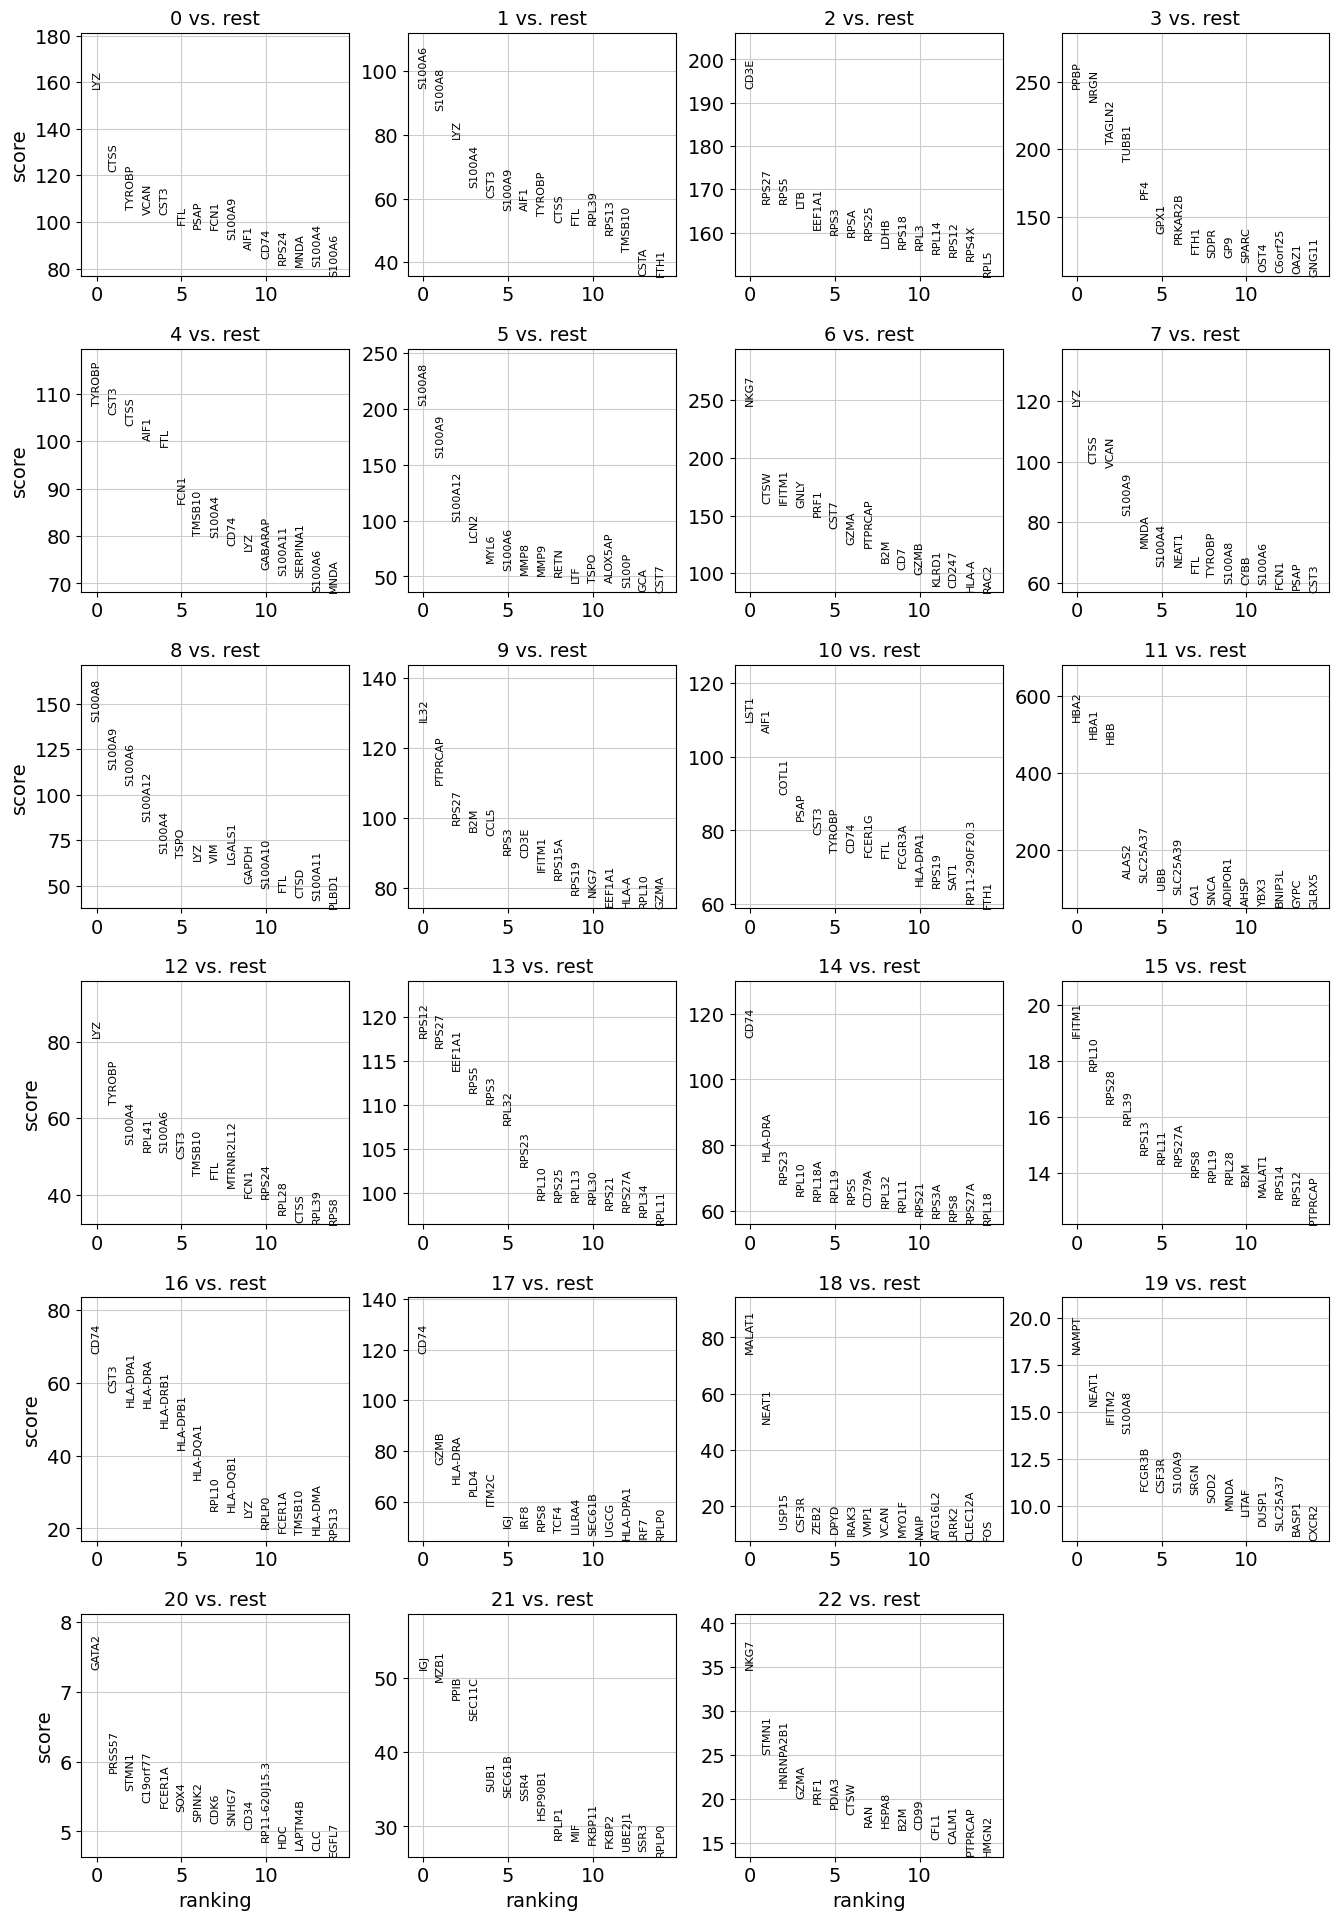

In [24]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False, save="_t-test.png")

In [25]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:34)


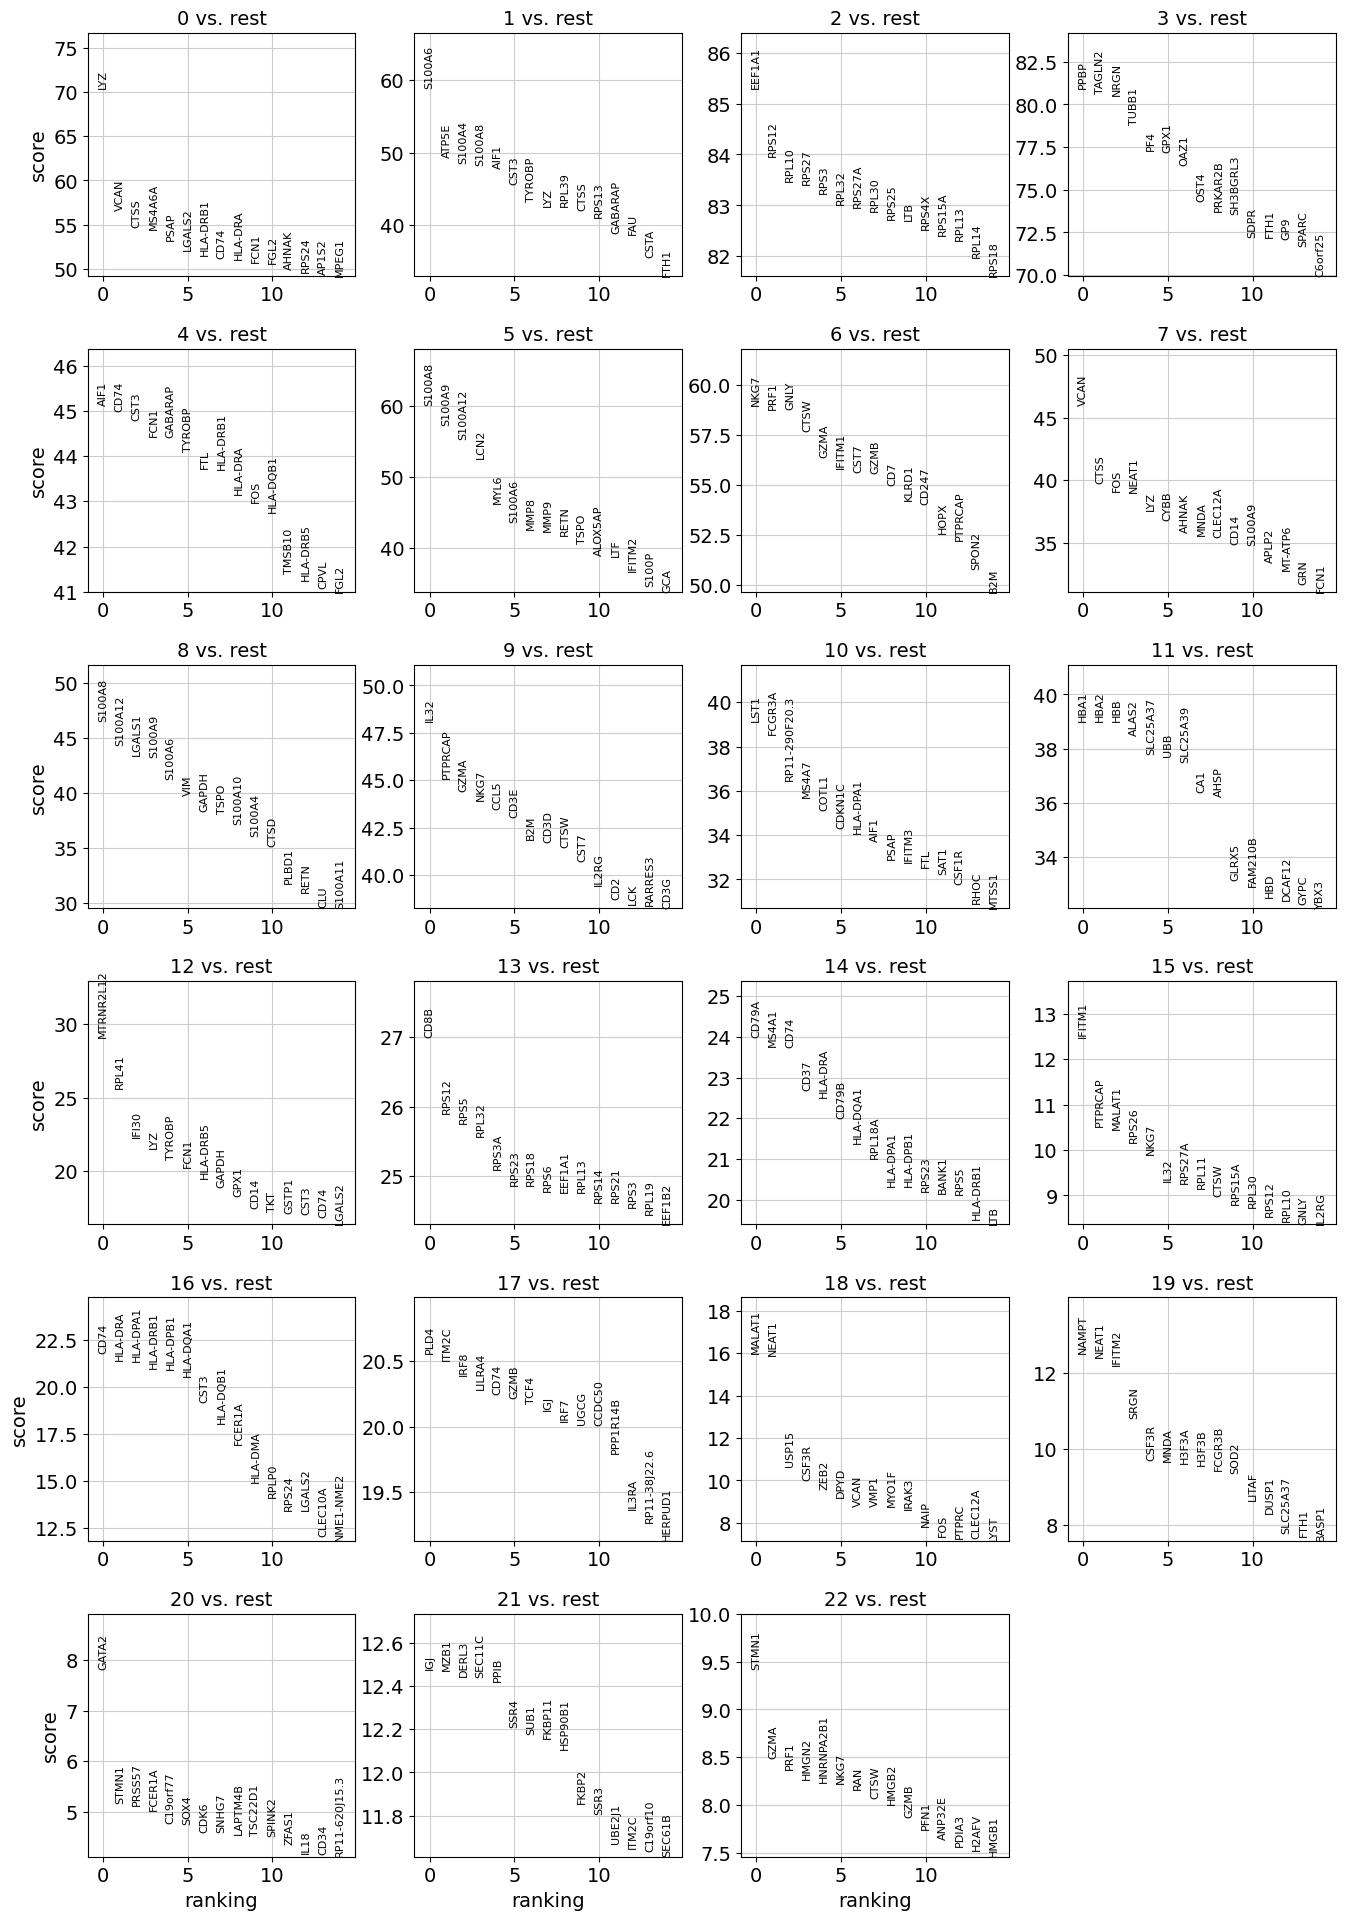

In [26]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False, save="_wilcoxon.png")

ranking genes
/home/chemo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
    finished (0:01:58)


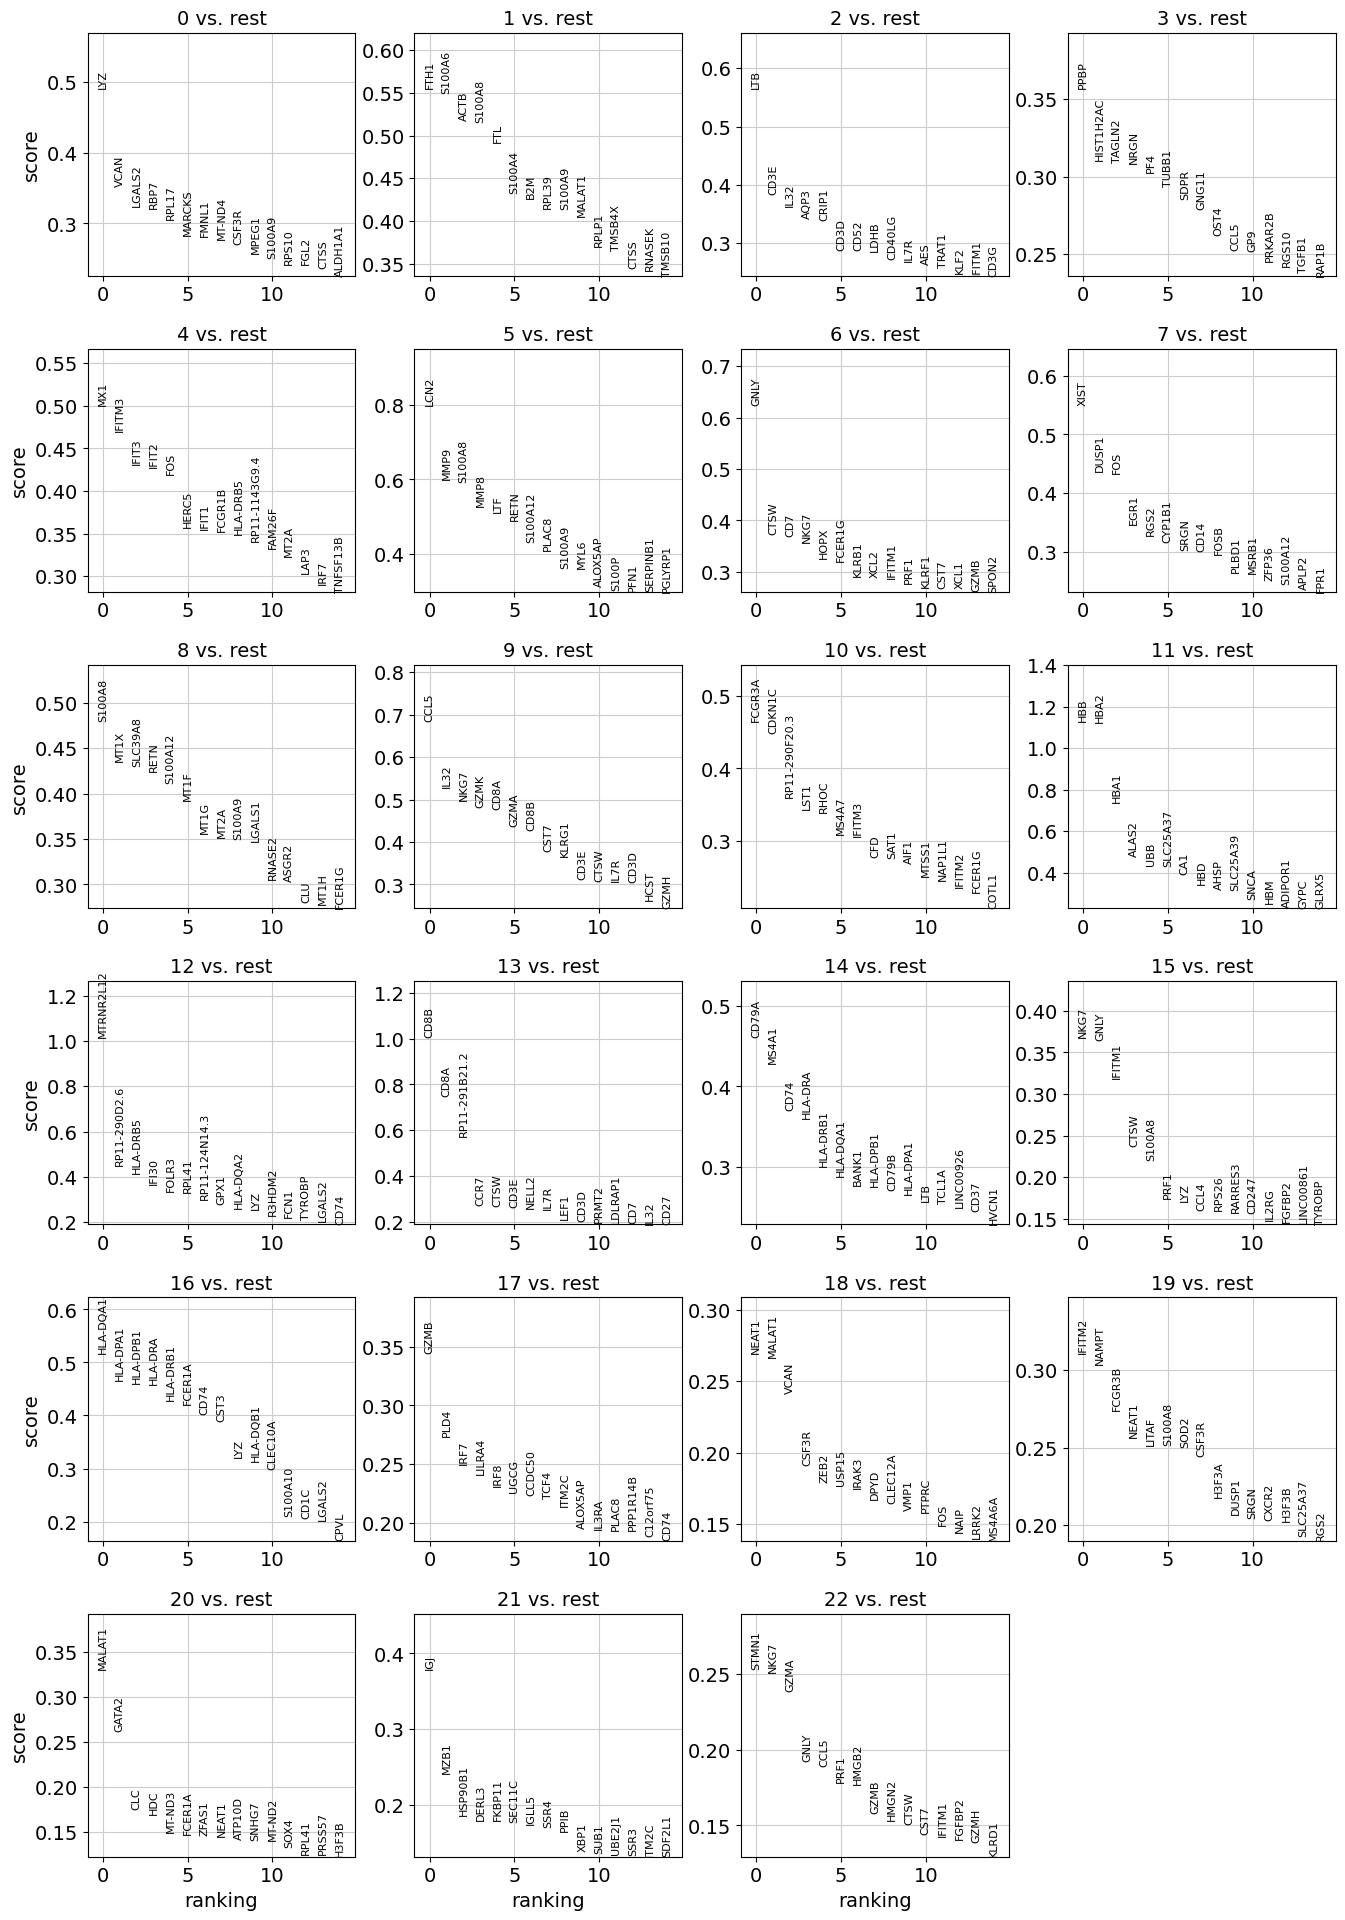

In [27]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False, save="_logreg.png")

In [28]:
adata.write(results_file)

In [29]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [30]:
adata = sc.read(results_file)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0       1      2          3       4       5     6      7        8  \
0     LYZ    FTH1    LTB       PPBP     MX1    LCN2  GNLY   XIST   S100A8   
1    VCAN  S100A6   CD3E  HIST1H2AC  IFITM3    MMP9  CTSW  DUSP1     MT1X   
2  LGALS2    ACTB   IL32     TAGLN2   IFIT3  S100A8   CD7    FOS  SLC39A8   
3    RBP7  S100A8   AQP3       NRGN   IFIT2    MMP8  NKG7   EGR1     RETN   
4   RPL17     FTL  CRIP1        PF4     FOS     LTF  HOPX   RGS2  S100A12   

      9  ...             13        14      15        16      17      18  \
0  CCL5  ...           CD8B     CD79A    NKG7  HLA-DQA1    GZMB   NEAT1   
1  IL32  ...           CD8A     MS4A1    GNLY  HLA-DPA1    PLD4  MALAT1   
2  NKG7  ...  RP11-291B21.2      CD74  IFITM1  HLA-DPB1    IRF7    VCAN   
3  GZMK  ...           CCR7   HLA-DRA    CTSW   HLA-DRA  LILRA4   CSF3R   
4  CD8A  ...           CTSW  HLA-DRB1  S100A8  HLA-DRB1    IRF8    ZEB2   

       19      20       21     22  
0  IFITM2  MALAT1      IGJ  STMN1  
1   NAMPT   GATA2     MZB1   NKG7  
2  FCGR3B     CLC  HSP90B1   GZMA  
3   NEAT1     HDC    DERL3   GNLY  
4   LITAF  MT-ND3   FKBP11   CCL5  

[5 rows x 23 columns]

In [31]:
#result = adata.uns['rank_genes_groups']
#groups = result['names'].dtype.names
#pd.DataFrame(
#    {group + '_' + key[:1]: result[key][group]
#    for group in groups for key in ['names', 'pvals']}).head(5)

ranking genes
    finished (0:00:07)


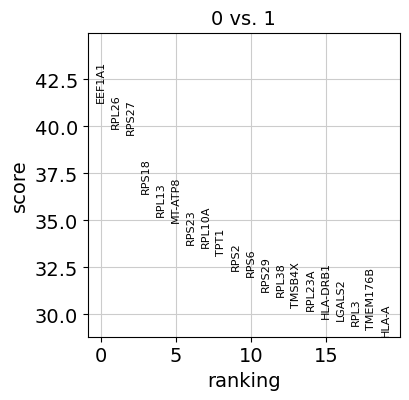

In [32]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20, save="_compare_single_cluster.png")

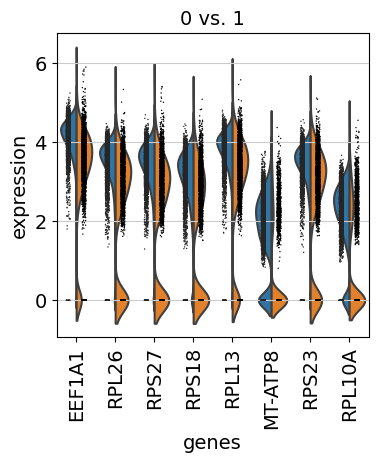

In [33]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

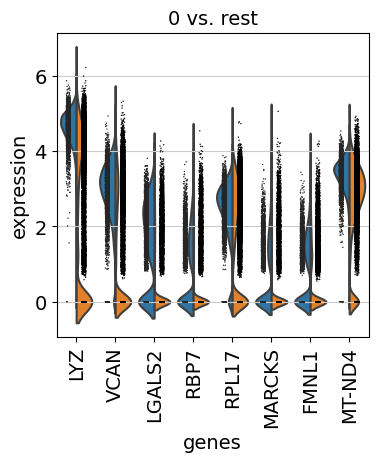

In [34]:
adata = sc.read(results_file)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

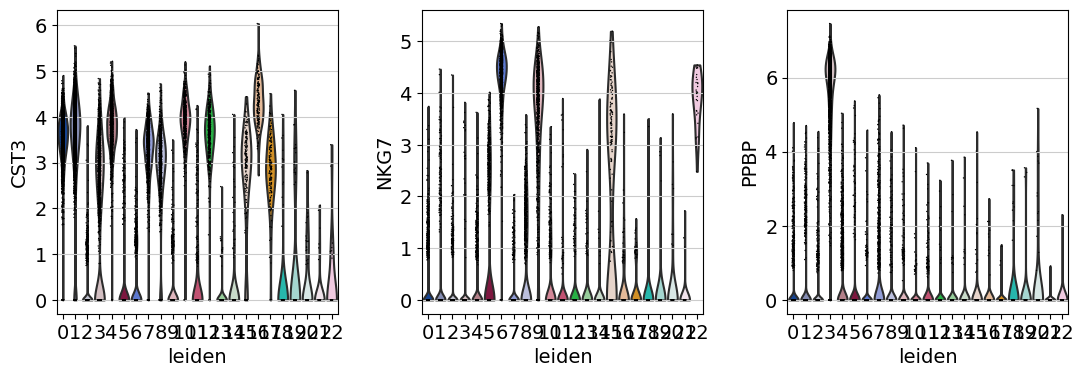

In [35]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')

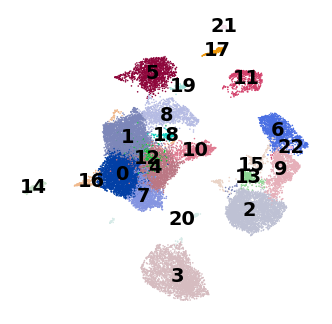

In [36]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

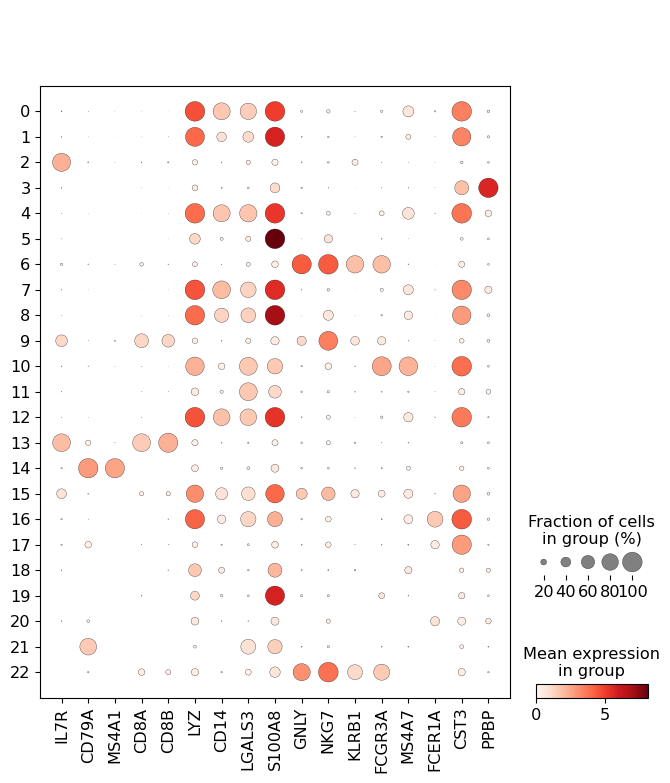

In [37]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden')

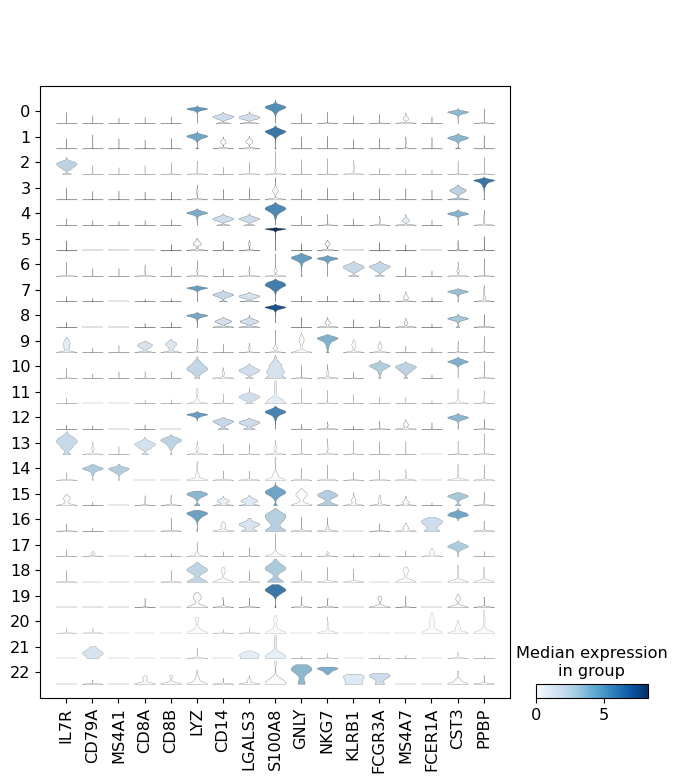

In [38]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90)

In [39]:
sc.tl.leiden(adata, resolution = 0.3, key_added = "leiden_0.3")
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata, key_added = "leiden_1.0") # default resolution in 1.0
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")

running Leiden clustering
    finished (0:00:02)
running Leiden clustering
    finished (0:00:03)
running Leiden clustering
    finished (0:00:02)
running Leiden clustering
    finished (0:00:05)


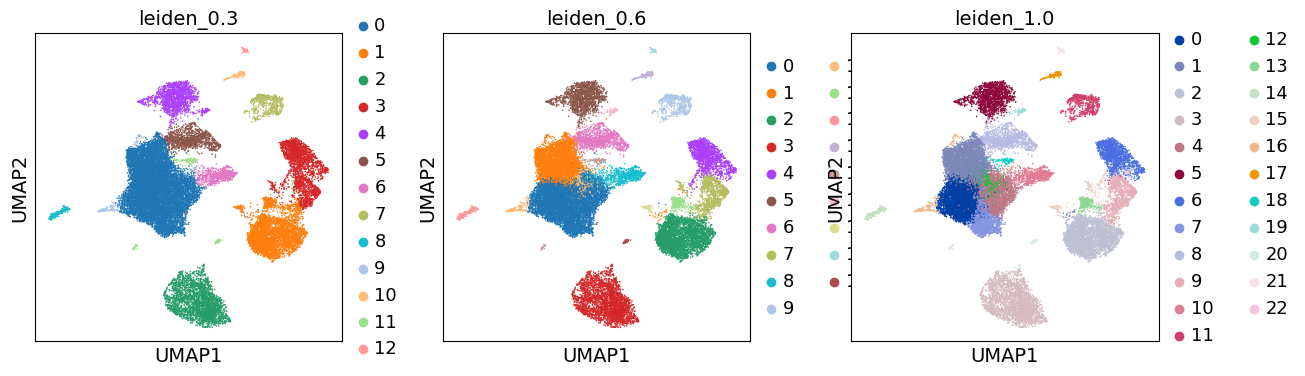

In [40]:
sc.pl.umap(adata, color=['leiden_0.3', 'leiden_0.6', 'leiden_1.0'], save="_leiden_umap.png")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_1.0']`


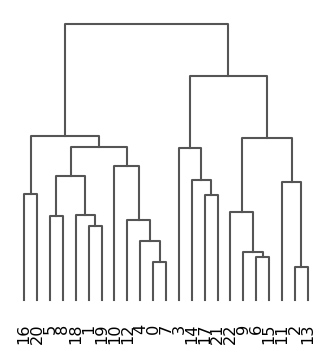

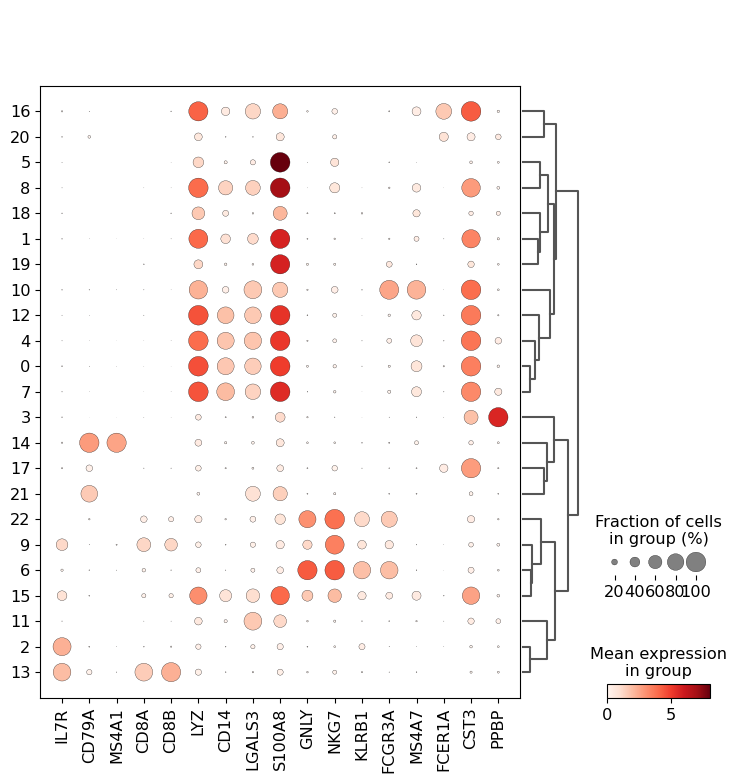

In [43]:
sc.tl.dendrogram(adata, groupby = "leiden_1.0")
sc.pl.dendrogram(adata, groupby = "leiden_1.0")


marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

#genes  = ["CD3E", "CD4", "CD8A", "GNLY","NKG7", "MS4A1","FCGR3A","CD14","LYZ","CST3","MS4A7","FCGR1A"]
sc.pl.dotplot(adata, marker_genes, groupby='leiden_1.0', dendrogram=True, save="_leiden_dendro.png")

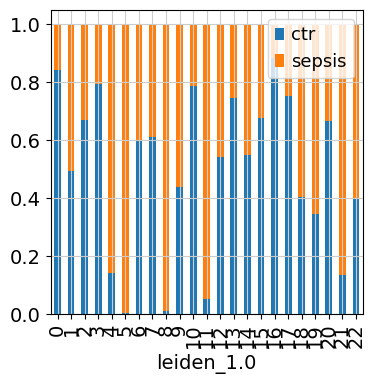

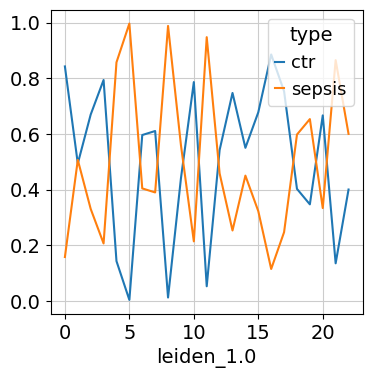

In [42]:
tmp = pd.crosstab(adata.obs['leiden_1.0'],adata.obs['type'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper right')
plot= tmp.plot()
fig = plot.get_figure()
fig.savefig("figures/output.png")

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:02)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:02)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:03)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:03)


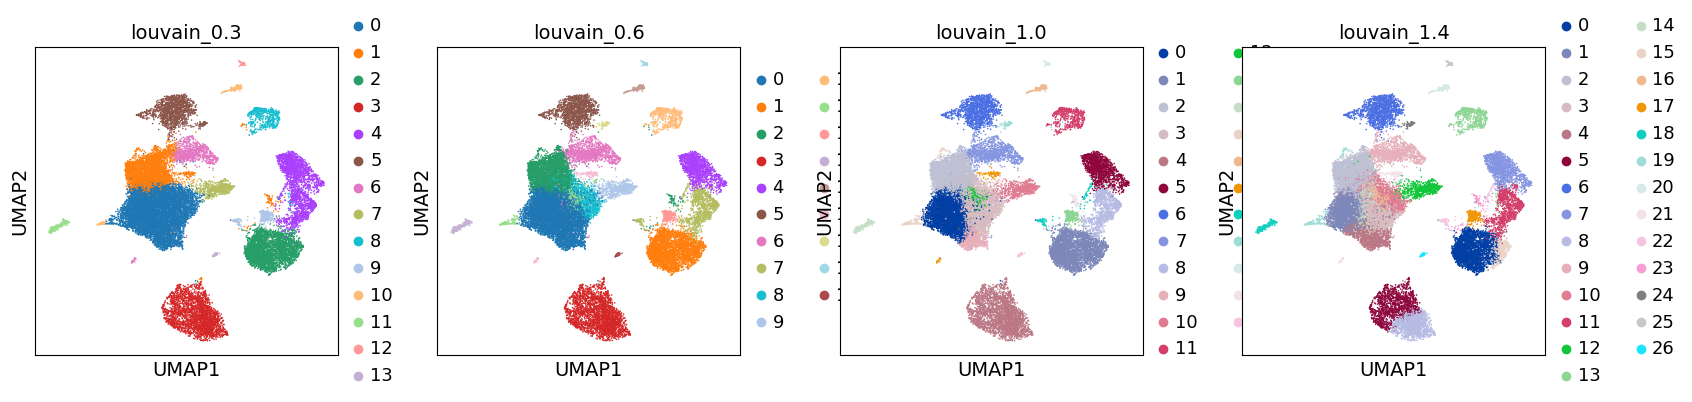

In [48]:
sc.tl.louvain(adata, resolution = 0.3, key_added = "louvain_0.3")
sc.tl.louvain(adata, resolution = 0.6, key_added = "louvain_0.6")
sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0
sc.tl.louvain(adata, resolution = 1.4, key_added = "louvain_1.4")

sc.pl.umap(adata, color=['louvain_0.3', 'louvain_0.6', 'louvain_1.0','louvain_1.4'], save="_louvain_umap.png")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain_0.6']`


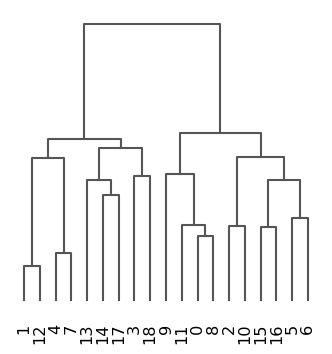

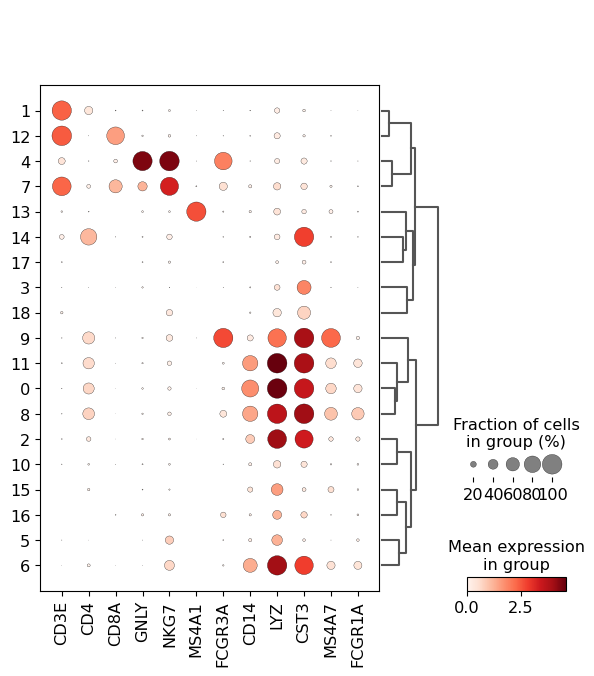

In [49]:
sc.tl.dendrogram(adata, groupby = "louvain_0.6")
sc.pl.dendrogram(adata, groupby = "louvain_0.6")

genes  = ["CD3E", "CD4", "CD8A", "GNLY","NKG7", "MS4A1","FCGR3A","CD14","LYZ","CST3","MS4A7","FCGR1A"]

sc.pl.dotplot(adata, genes, groupby='louvain_0.6', dendrogram=True, save="_louvan_dendro.png")

In [48]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=10, key="wilcoxon", groupby="louvain_0.6",
                                show_gene_labels=True, save="_top_10_gene.png")

KeyError: 'wilcoxon'